# predicting heart disease using machine learning

This notebook looks into using various python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes

We're going to take fowllowing approach:
1. Problem defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not the have heart disease?

## 2. Data

The original data came from the Cleavland dta from the RCI Machine Learning rrepository

There is also a version of it availaible on kaggle.

## 3. Evaluation

> If we can reach 95% accuaacy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## Features

This is where you'll get different information about each of the features in your data.

**create data dictionary**

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target 0 or 1


## Preparing the tools

We're going to use pandas , matplotlib and numpy for data analysis and manipulation

In [2]:
# Import all the tools we need

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# models from scikit larn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve



## Load data

In [3]:
df=pd.read_csv('heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
df.shape

(303, 14)

## Data exploration EDA

The goal here is to findour more about the data and become a subject expert on the data set you are working with.

1. What questions are you trying to solve?
2. hat kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you daal with it:?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
# lets find how many of each class there are
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

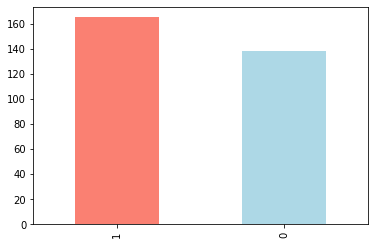

In [8]:
df.target.value_counts().plot(kind='bar',color=['salmon','lightblue']);

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
# Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### heart disease FRequench according to sex

In [13]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [14]:
# compare target with sex
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


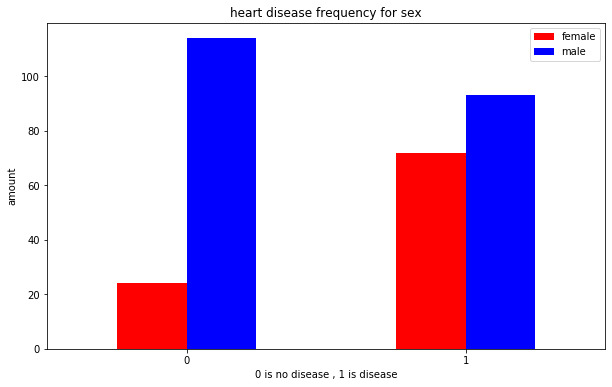

In [19]:
#  create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['red','blue'])
plt.title('heart disease frequency for sex')
plt.xlabel('0 is no disease , 1 is disease')
plt.ylabel('amount')
plt.legend(['female','male'])
plt.xticks(rotation=0);

In [23]:
### Age bs. Max heart rage for heart disease

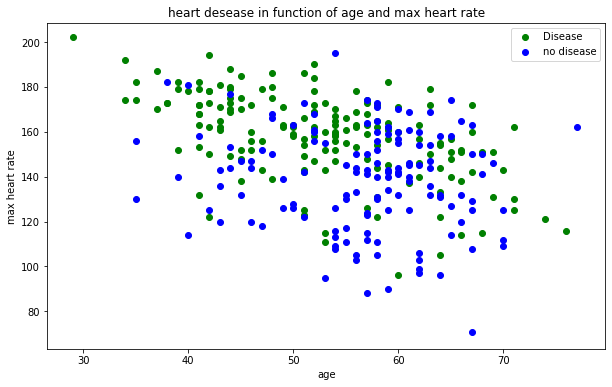

In [31]:
# create another figure
plt.figure(figsize=(10,6))

# scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c='green')

# scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c='blue')
# Add some helpful imfo
plt.title('heart desease in function of age and max heart rate')
plt.xlabel('age')
plt.ylabel('max heart rate')
plt.legend(['Disease','no disease']);

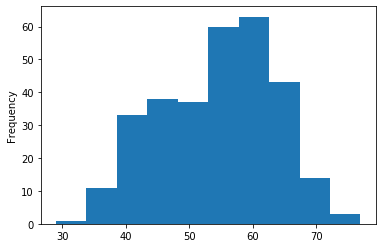

In [33]:
# check the distrubution of the age column with a histogram
df.age.plot.hist();

### Heat Disease for chest pain type

cp -chest pain type
* 0:Typical anigina: chest pain related decrease blood supply to heart
* 1:Atypical angina:Chest pain not related to heart
* 2:Non-aginal pain: typically esophageal spasms (non heart related)
* 3:Assymptomatic: chest pain not showing signs of disease


In [34]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


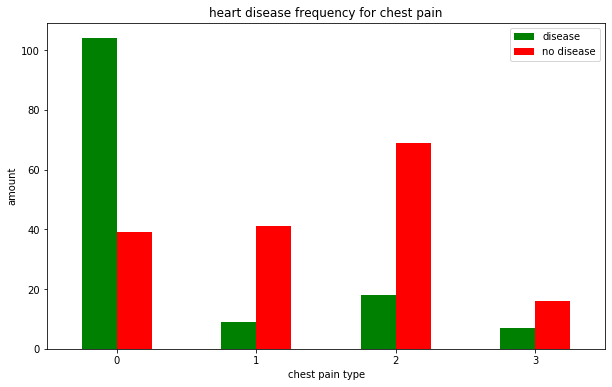

In [39]:
# make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind='bar',color=['green','red'],figsize=(10,6))
plt.title('heart disease frequency for chest pain')
plt.xlabel('chest pain type')
plt.ylabel('amount')
plt.legend(['disease','no disease'])
plt.xticks(rotation =0);

In [40]:
# Make a correlatio matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


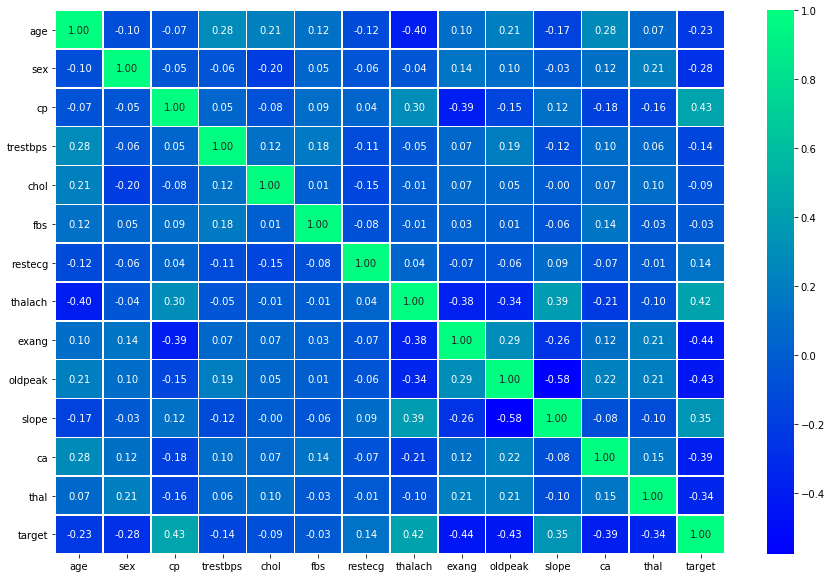

In [44]:
# let's make our correlation matrix a little prettier
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt='.2f',
              cmap='winter');

## 5. Modelling

In [45]:
# split our data into x and y
x=df.drop('target',axis=1)
y=df['target']


In [50]:
# split our model into train and test
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [47]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


now we have got our train and test sets its time to build mode

we'll train it on train set 

we'll test it on the test set

we are going to try 3 models
1. Logistic Regression
2. K-Nearest Neighbours classifier
3. Random Forest Classifier

In [48]:
# put models in a dictionary
models={'Logistic Regression': LogisticRegression(),
       'KNN':KNeighborsClassifier(),
       'Random Forest':RandomForestClassifier()}
# create a function to fit and score models

def fit_and_score(models,x_train,x_test,y_train,y_test):
    # set random seek
    np.random.seed(42)
    # make dictinary for modelscore
    model_scores={}
    # loop through models
    for name,model in models.items():
        # fit the model to data
        model.fit(x_train,y_train)
        # Evaluate the model and append its score to model _scores
        model_scores[name]=model.score(x_test,y_test)
    return model_scores


In [51]:
model_scores=fit_and_score(models,x_train,x_test,y_train,y_test)
model_scores

/home/akash/Desktop/ml/project2/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model comparision

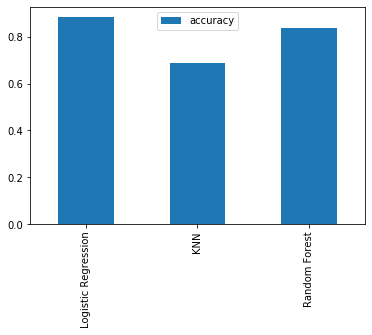

In [53]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot(kind='bar')

Now we have got a bseline model and its first predictions are  not best 
Let's look at the following:
* Hyperparameter tuining
* Feature importance 
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report 
* ROC curve 
* Area under the curve(AUC)

### Hyperparameter tuining


In [55]:
# let's tune knn
train_scores=[]
test_scores=[]

# Create a list of different values for n_neighbors
neighbors=range(1,21)
# Setup knn instance
knn=KNeighborsClassifier()

# loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    # fit the algorithm
    knn.fit(x_train,y_train)
    # update training scores list
    train_scores.append(knn.score(x_train,y_train))
    # update test scores list
    test_scores.append(knn.score(x_test,y_test))
    
    

In [56]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [57]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data75.41


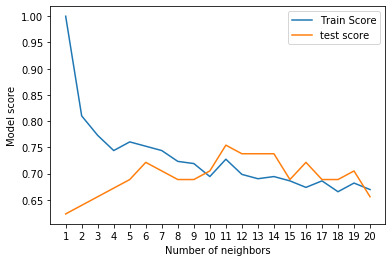

In [65]:
plt.plot(neighbors,train_scores,label='Train Score')
plt.plot(neighbors,test_scores,label='test score')

plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()
plt.xticks(np.arange(1,21,1))
print(f'Maximum KNN score on the test data{max(test_scores)*100:.2f}');

## Hyper parameter tuning with RandomizedSearchCV

We are going to tune:
* LogisticRegression()
* RandomForestClassifier()

***Using randomized search cv***

In [96]:
# create a hyper parameter grid for logistic regression
log_reg_grid={
    'C':np.logspace(-4,4,20),
    'solver':['liblinear'],
}
# for RandomForestClassifier
rf_grid={
    'n_estimators':np.arange(10,1000,100),
    'max_depth':[None,3,5,7,9,10],
    'min_samples_split':np.arange(2,20,2),
    'min_samples_leaf':np.arange(1,20,2)
}


now We have hyperparameter grids 

tume them using randomized search cv

In [71]:
# Tune LogisticRegression
np.random.seed(42)

# setup random hyperparameter search
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)
# fit random hyperparameter search model for logistic regression
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [73]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [74]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

now we have tuned logisticRegression lets do the same random forest


In [97]:
# setup random seed
np.random.seed(42)
# setup random hyperparameter search for RandomForestClassifier
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                         n_iter=20,
                        verbose=True)
# fit random hyperparameter search modle RFC
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   34.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [98]:
# find best hyperparameters
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 2,
 'min_samples_leaf': 15,
 'max_depth': 5}

In [99]:
# evaluate the model
rs_rf.score(x_test,y_test)

0.8688524590163934

### Use GridSearchCV with our LogisticRegression model

Since our LogisticRegression model provides the best scores so far, we'll try using GridSearchCV

In [93]:
# diffeent hyperparameter for logisticregression

log_reg_grid={
    'C':np.logspace(-4,4,30),
    'solver':['liblinear']
}

# setup grid hyperparameter search logistic
gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)

# FitThe grid hyperparameter search model
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [94]:
# check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [95]:
# Evaluate grid search 
gs_log_reg.score(x_test,y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier ,beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification repor
* precision
* Recall
* F1-score
...And it would geat if cross-balidation was used where possible

To make comparision and evaluate our trained model, first we need to make predictions.


In [100]:
# make prediction with tuned model
y_preds=gs_log_reg.predict(x_test)

In [101]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

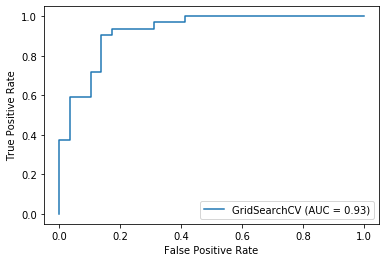

In [102]:
# Plot Roc curve and calculate AUC metric
plot_roc_curve(gs_log_reg,x_test,y_test)

In [103]:
# confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


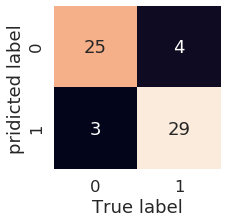

In [108]:
# use seaborn heatmap
sns.set(font_scale=(1.5))

def plot_conf_mat(y_test,y_preds):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,cbar=False)
    plt.xlabel('True label')
    plt.ylabel('pridicted label')
plot_conf_mat(y_test,y_preds)

now we have ROC curve ,Auc matrix.lets get classification report as well as predision ,recall and f1 score

In [109]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluationmetrics using cross-validation
we are going to calculate precision ,recall and f1-score of our matrix using cross_val_score()

In [110]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [117]:
# create new classifier with best paramerters
clf=LogisticRegression(C =0.20433597178569418, solver= 'liblinear')

In [118]:
#Cross-validated accuracy
cv_acc=cross_val_score(clf,x,y,cv=5,scoring='accuracy')

cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [120]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [121]:
# cross _validated precision
cv_precision=cross_val_score(clf,x,y,cv=5,scoring='precision')

cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [122]:
# cross validated recall
cv_recall=cross_val_score(clf,x,y,cv=5,scoring='recall')

cv_recall=np.mean(cv_precision)
cv_recall

0.8207936507936507

In [124]:
cv_f1=cross_val_score(clf,x,y,cv=5,scoring='f1')

cv_f1=np.mean(cv_precision)
cv_f1

0.8207936507936507

In [126]:
# visualize our cross validated matrix
cv_metrics=pd.DataFrame({'Accuracy':cv_acc,
                        'Precisiion':cv_precision,
                        'Recall':cv_recall,
                        'f1':cv_f1},index=[0])

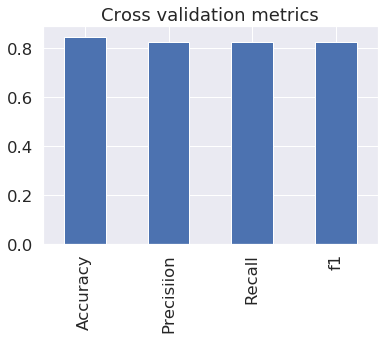

In [127]:
cv_metrics.T.plot.bar(title='Cross validation metrics',legend=False)

### Feature importance 

Feture importance is another way of asking, wihich features contributed most to the outcmoes of the model and how did they contribute?

finding feature importance is different for eachof machine learning model

Lets find the feature importance for the LOgisticRegression model...

In [128]:
# Fit an instance of Logistic
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [129]:
clf=LogisticRegression(C= 0.20433597178569418, solver='liblinear')
clf.fit(x_train,y_train)


LogisticRegression(C=0.20433597178569418, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [130]:
# check coer_
clf.coef_

array([[ 0.00316727, -0.86044576,  0.66067074, -0.01156993, -0.00166374,
         0.04386132,  0.31275782,  0.02459361, -0.60413035, -0.56862855,
         0.45051615, -0.63609861, -0.67663376]])

In [132]:
# match coef of features to coloumns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))

In [133]:
feature_dict

{'age': 0.0031672715846030935,
 'sex': -0.8604457571727641,
 'cp': 0.6606707429832999,
 'trestbps': -0.011569931252544003,
 'chol': -0.0016637408611369841,
 'fbs': 0.04386132427617729,
 'restecg': 0.3127578230667477,
 'thalach': 0.024593607391386427,
 'exang': -0.6041303464142003,
 'oldpeak': -0.5686285482723883,
 'slope': 0.4505161474321694,
 'ca': -0.6360986111170053,
 'thal': -0.6766337550845071}

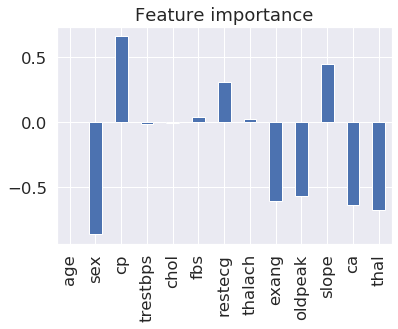

In [134]:
# visualize feature importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title='Feature importance',legend=False)

In [135]:
pd.crosstab(df['sex'],df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [136]:
pd.crosstab(df['slope'],df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Experimentation

If you have not hit your evaluation metric yet.... ask yourself...

* Could you collect more data?
* Could you try a better model? Like CagBoost or XGBoost?
* Could you improve the current models?(beyond what we have done so far)
* If your model is good enough (you have hit your evaluation metric how would you export it and share it with others?)
